In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPool1D, Dropout,LSTM, Input, Activation, Flatten
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from time import time
from keras.layers import LeakyReLU, PReLU
import tensorflow as tf
from tensorflow.python.client import device_lib
from sklearn.preprocessing import StandardScaler


Read the csv file and save it to a Dataframe

In [4]:
df =  pd.read_csv(r"C:\Users\SONA\Music\ITML22- Epileptic Seizure Prediction\DATASET\Epileptic Seizure Recognition (2).csv")
df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,1.035677,1.028781,0.955837,0.813229,0.401814,0.001752,-0.363469,-0.605002,-0.649010,-0.671846,...,1.330012,1.253165,0.980704,0.563123,0.173404,-0.111043,-0.342705,-0.535510,-0.660125,-0.701086
1,-0.060125,-0.038607,-0.020496,-0.013331,-0.021589,-0.023567,-0.058706,-0.088185,-0.099391,-0.087888,...,-0.062492,-0.013838,0.015981,0.060368,0.102255,0.124880,0.119145,0.095079,0.064094,0.032469
2,0.536842,2.519096,3.986116,4.863375,5.239507,5.255527,4.969877,4.424507,3.781248,3.022416,...,3.090199,3.318059,3.455079,3.116485,2.560861,1.854986,1.336018,0.885361,0.378612,-0.293098
3,-0.137813,-0.191667,-0.036701,-0.013331,0.016140,-0.044667,-0.075637,-0.012553,0.038013,-0.034047,...,-0.128988,-0.366674,-0.448217,-0.513643,-0.561806,-0.476725,-0.475236,-0.400384,-0.093165,0.065438
4,0.271069,0.154731,0.068630,-0.021597,-0.076087,-0.145944,-0.202622,-0.231045,-0.186831,-0.137586,...,-0.175927,-0.246389,-0.310976,-0.339460,-0.352311,-0.370559,-0.394914,-0.355342,-0.300085,-0.251887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,-0.190967,-0.103053,-0.065059,0.027997,-0.042550,-0.205023,-0.287278,-0.411721,-0.386692,-0.402645,...,0.234784,0.507398,0.524580,0.495825,0.224790,0.215318,0.191434,0.344857,0.453103,0.456943
1796,-0.268655,-0.316531,-0.267618,-0.203440,-0.113816,-0.061546,-0.033309,-0.071378,-0.111883,-0.096171,...,-0.175927,-0.246389,-0.286757,-0.299873,-0.320689,-0.370559,-0.394914,-0.449520,-0.515281,-0.565090
1797,0.144316,0.122508,0.096988,0.027997,0.020332,-0.015127,-0.003680,0.021061,0.075487,0.110907,...,0.015738,-0.009828,-0.020348,-0.002971,0.035058,0.014783,0.050871,0.058226,0.064094,0.069559
1798,0.038007,-0.002356,-0.024547,-0.013331,0.011948,0.043951,0.030183,0.042070,0.050505,0.061208,...,-0.031200,-0.086009,-0.109151,-0.090062,-0.071666,-0.067791,-0.061579,-0.080995,-0.055920,-0.008742


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Columns: 178 entries, 0 to 177
dtypes: float64(178)
memory usage: 2.4 MB


Check for Null Values

In [9]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int64

In [11]:
df.describe(include="all")

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.030204,0.029750,0.027729,0.021031,0.017120,0.015495,0.016217,0.022261,0.027012,0.033347,...,0.008235,-0.002221,-0.007050,-0.005126,0.001154,0.012884,0.024901,0.035939,0.040264,0.033703
std,1.002598,0.978528,0.976693,1.005373,1.036119,1.051323,1.047572,1.031935,1.015422,1.003839,...,0.987038,1.024490,1.047950,1.021497,0.977969,0.932692,0.930426,0.953035,0.995033,1.026826
min,-7.456791,-7.345180,-7.381480,-6.931642,-5.710281,-6.344976,-6.234382,-6.794196,-7.519241,-7.737331,...,-6.700355,-7.435427,-7.471727,-6.431900,-5.293241,-5.572671,-6.511410,-7.209918,-6.110385,-5.337324
25%,-0.268655,-0.285315,-0.291925,-0.294362,-0.302461,-0.293641,-0.321141,-0.319282,-0.300294,-0.303248,...,-0.254157,-0.283477,-0.282720,-0.277111,-0.274244,-0.276190,-0.266399,-0.269352,-0.250424,-0.265280
50%,0.035962,0.025839,0.024067,0.015598,-0.004821,-0.021457,-0.029076,-0.029360,-0.024443,-0.021623,...,0.011827,0.014229,0.015981,0.020781,0.035058,0.038375,0.030791,0.041847,0.030987,0.040712
75%,0.307868,0.299735,0.295496,0.301795,0.292819,0.284486,0.262988,0.278419,0.271185,0.273463,...,0.285634,0.286875,0.279362,0.301849,0.308786,0.305755,0.316937,0.324383,0.333089,0.325067
max,5.112226,5.519866,5.213621,4.863375,5.273044,5.255527,5.537074,5.193429,4.734753,5.300269,...,5.523170,5.739799,5.759921,4.723717,4.711154,4.461940,4.564950,5.131595,5.249498,5.068454


In [22]:
print(df.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '168', '169', '170', '171', '172', '173', '174', '175', '176', '177'],
      dtype='object', length=178)


In [24]:
print(df.head())


          0         1         2         3         4         5         6  \
0  1.035677  1.028781  0.955837  0.813229  0.401814  0.001752 -0.363469   
1 -0.060125 -0.038607 -0.020496 -0.013331 -0.021589 -0.023567 -0.058706   
2  0.536842  2.519096  3.986116  4.863375  5.239507  5.255527  4.969877   
3 -0.137813 -0.191667 -0.036701 -0.013331  0.016140 -0.044667 -0.075637   
4  0.271069  0.154731  0.068630 -0.021597 -0.076087 -0.145944 -0.202622   

          7         8         9  ...       168       169       170       171  \
0 -0.605002 -0.649010 -0.671846  ...  1.330012  1.253165  0.980704  0.563123   
1 -0.088185 -0.099391 -0.087888  ... -0.062492 -0.013838  0.015981  0.060368   
2  4.424507  3.781248  3.022416  ...  3.090199  3.318059  3.455079  3.116485   
3 -0.012553  0.038013 -0.034047  ... -0.128988 -0.366674 -0.448217 -0.513643   
4 -0.231045 -0.186831 -0.137586  ... -0.175927 -0.246389 -0.310976 -0.339460   

        172       173       174       175       176       177  
0  0

In [28]:
data = {'X1': [1, 2, 3, 4, 5]}  # Example data
df = pd.DataFrame(data)


<Axes: >

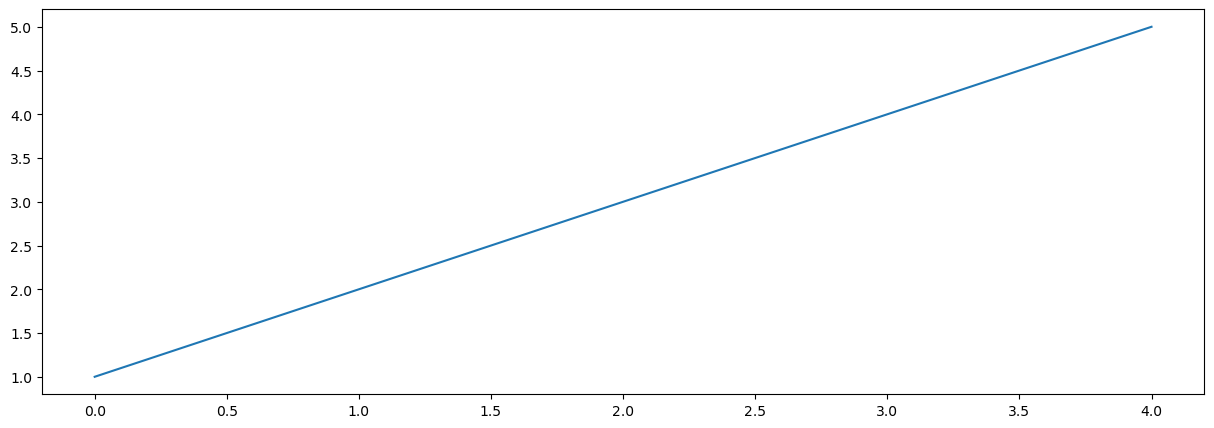

In [30]:
plt.figure(figsize=(15,5))
df['X1'].plot()

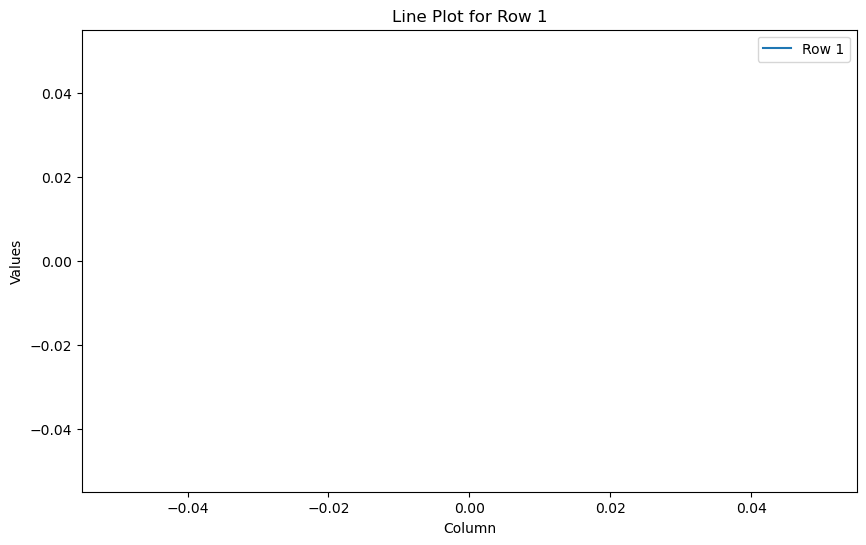

In [32]:
row_index = 0
row_values = df.iloc[row_index, 1:178]
plt.figure(figsize=(10, 6))
plt.plot(row_values.index, row_values, label=f'Row {1}')
plt.title(f'Line Plot for Row {1}')
plt.xlabel('Column')
plt.ylabel('Values')
plt.legend()
plt.show()

In [57]:
print(f"DataFrame shape: {df.shape}")
print(df.head())  # Print the first few rows to understand its content


DataFrame shape: (5, 1)
   X1
0   1
1   2
2   3
3   4
4   5


In [59]:
row_index = 100
num_rows = df.shape[0]

if row_index >= num_rows:
    print(f"Row index {row_index} is out of bounds. DataFrame has {num_rows} rows.")
else:
    print(f"Row index {row_index} is within bounds.")


Row index 100 is out of bounds. DataFrame has 5 rows.


In [61]:
start_col = 1
end_col = 178
num_cols = df.shape[1]

if start_col >= num_cols:
    print(f"Starting column index {start_col} is out of bounds. DataFrame has {num_cols} columns.")
elif end_col > num_cols:
    print(f"Ending column index {end_col} is beyond the DataFrame's column count. Adjusting to {num_cols}.")
    end_col = num_cols


Starting column index 1 is out of bounds. DataFrame has 1 columns.


In [63]:
if row_index < num_rows and start_col < num_cols:
    # Adjust the column range if needed
    if end_col > num_cols:
        end_col = num_cols
        
    try:
        row_values = df.iloc[row_index, start_col:end_col]
        print(row_values)
    except IndexError as e:
        print(f"IndexError: {e}")


In [73]:
df["y"].value_counts()

KeyError: 'y'

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

In [ ]:
values = df['y'].value_counts()
plt.figure(figsize=(7,7))
values.plot(kind='pie',fontsize=17, autopct='%.2f')
plt.legend(loc="best")
plt.show()

In [ ]:
df = df.drop(['Unnamed'], axis = 1)

In [ ]:
df.head()

In [ ]:
df['y'] = df['y'].replace([2,3,4,5],0)

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure.

In [ ]:
df["y"].value_counts()

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'y', data=df)
plt.show()

In [ ]:
from sklearn.utils import resample
df_majority = df[df['y']== 0]
df_minority = df[df['y']== 1]

df_minority_upsampled = resample(df_minority, replace=True,n_samples=3000,random_state=100)
df_majority_upsampled = resample(df_majority, replace=True,n_samples=3000,random_state=100)

df_balanced = pd.concat([df_minority_upsampled,df_majority_upsampled])

# Display new class counts
df_balanced['y'].value_counts()

In [ ]:
df= df_balanced

In [43]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
7711,-109,-142,-169,-191,-219,-216,-213,-213,-214,-235,...,-275,-244,-183,-124,-63,84,207,305,312,1
9335,-222,-188,-106,4,114,200,220,174,69,-47,...,-126,-74,-12,59,130,144,119,34,-58,1
377,283,414,206,-65,-364,-504,-566,-560,-486,-335,...,40,-3,-101,-198,-364,-568,-668,-460,-108,1
9727,371,271,132,39,-48,-103,-118,-188,-338,-516,...,-510,-416,-225,88,342,628,696,624,402,1
1751,135,134,136,139,142,145,147,147,148,150,...,-98,-173,-267,-431,-556,-645,-662,-648,-569,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,-36,-9,-4,-10,-17,-15,-22,-13,-18,-33,...,26,-1,-20,-48,-59,-43,-25,-15,-16,0
9045,43,48,46,38,29,13,1,1,-1,7,...,10,38,53,53,56,46,30,6,-18,0
5984,12,17,9,-8,-8,14,49,80,74,30,...,-11,-6,4,15,26,23,4,11,34,0
4595,-73,-68,-64,-56,-46,-41,-30,-21,-14,-13,...,19,27,47,55,69,65,46,40,30,0


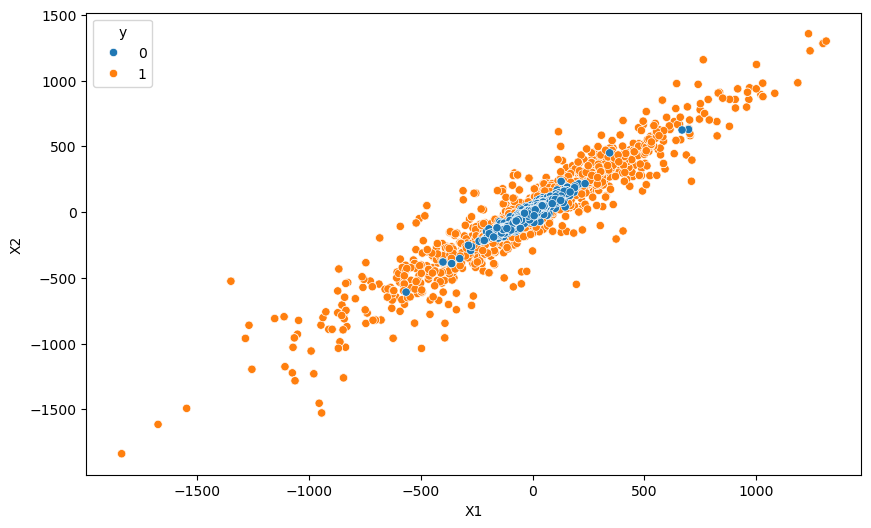

In [45]:
plt.figure(figsize=(10,6),dpi=100)
sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'y', data=df)
plt.show()

In [46]:
x = df.drop(columns=['y'])
y = df['y']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [51]:
x_train.shape

(4200, 178)

In [53]:
x_test.shape

(1800, 178)

In [57]:
pd.DataFrame(x_test).to_csv(r"C:\Users\HP\Desktop\ITML22- Epileptic Seizure Prediction\DATASET\Epileptic Seizure Recognition (2).csv",index=False)

## **LSTM**

In [60]:
model = Sequential()
model.add(Input(shape=(178,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(16,return_sequences=True))
model.add(LSTM(8))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 178, 32)             │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 178, 16)             │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 250)                 │           2,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,789 (42.14 KB)

 Trainable params: 10,789 (42.14 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
History_1 = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
33/33 - 15s - 457ms/step - accuracy: 0.8564 - loss: 0.5833 - val_accuracy: 0.9289 - val_loss: 0.3298
Epoch 2/10
33/33 - 9s - 279ms/step - accuracy: 0.9160 - loss: 0.2909 - val_accuracy: 0.8961 - val_loss: 0.3127
Epoch 3/10
33/33 - 10s - 310ms/step - accuracy: 0.9279 - loss: 0.2454 - val_accuracy: 0.9539 - val_loss: 0.1770
Epoch 4/10
33/33 - 6s - 170ms/step - accuracy: 0.9545 - loss: 0.1566 - val_accuracy: 0.9683 - val_loss: 0.1210
Epoch 5/10
33/33 - 5s - 161ms/step - accuracy: 0.9605 - loss: 0.1286 - val_accuracy: 0.9678 - val_loss: 0.1027
Epoch 6/10
33/33 - 5s - 166ms/step - accuracy: 0.9643 - loss: 0.1129 - val_accuracy: 0.9694 - val_loss: 0.0982
Epoch 7/10
33/33 - 10s - 305ms/step - accuracy: 0.9667 - loss: 0.1034 - val_accuracy: 0.9711 - val_loss: 0.0983
Epoch 8/10
33/33 - 10s - 314ms/step - accuracy: 0.9688 - loss: 0.0950 - val_accuracy: 0.9728 - val_loss: 0.0923
Epoch 9/10
33/33 - 10s - 311ms/step - accuracy: 0.9693 - loss: 0.0900 - val_accuracy: 0.9756 - val_loss: 0.0

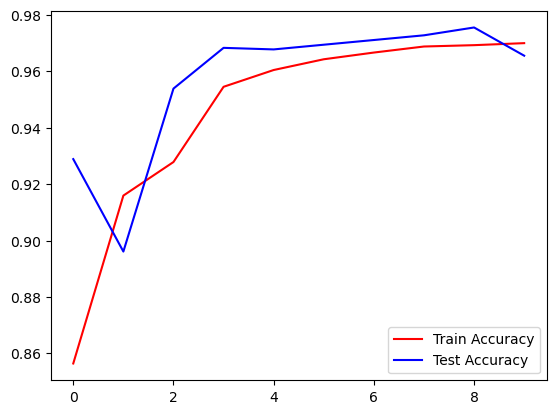

In [65]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(x_test)
y_pred_binary = np.round(y_pred)
class_report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(class_report)

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       885
           1       0.97      0.97      0.97       915

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800



In [67]:
#pip install pydot


In [68]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, dpi=70)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [69]:
loss,accuracy=model.evaluate(x_test, y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9642 - loss: 0.0856


In [70]:
loss,accuracy

(0.08894454687833786, 0.9655555486679077)

Confusion Matrix:
[[855  30]
 [ 32 883]]


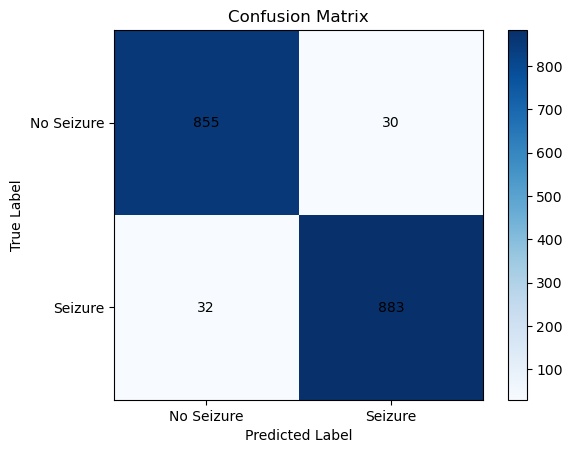

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Seizure', 'Seizure']  # Assuming binary classification
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')


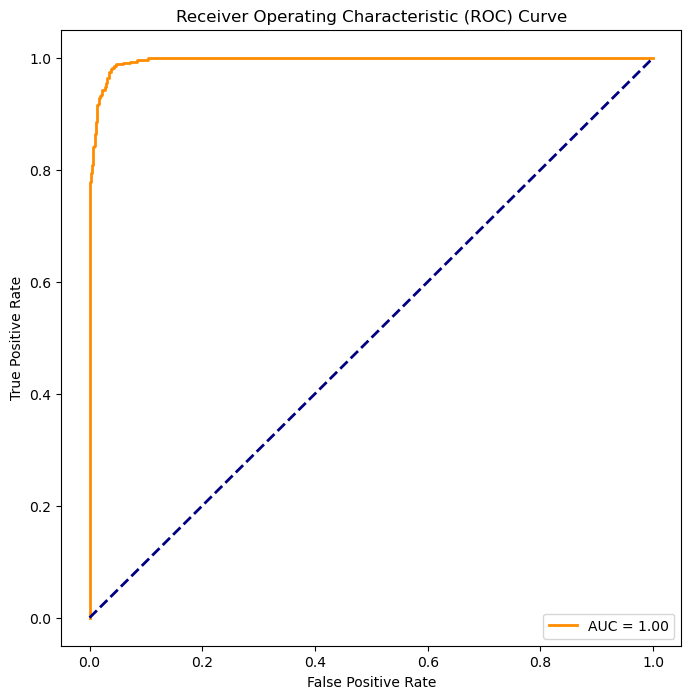

In [76]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
# Assuming your trained model object is named `model`
file_name = r'C:\Users\HP\Desktop\ITML22- Epileptic Seizure Prediction\CODE\FRONT END\LSTM_model.h5'

# Save the model
model.save(file_name)

print("Model saved successfully.")


Model saved successfully.


### CNN


In [81]:
model1 = Sequential()
model1.add(Conv1D(256, 3, activation='relu', input_shape=(178,1),  padding='same'))
model1.add(MaxPool1D(2))
model1.add(Dropout(0.2))
model1.add(Conv1D(256, 3, activation='relu', input_shape=(178,1),  padding='same'))
model1.add(MaxPool1D(2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(250, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 178, 256)            │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 89, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 89, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 44, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 44, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 11264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │       2,816,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,014,389 (11.50 MB)

 Trainable params: 3,014,389 (11.50 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
train = model1.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
33/33 - 15s - 452ms/step - accuracy: 0.7690 - loss: 0.3839 - val_accuracy: 0.9472 - val_loss: 0.1501
Epoch 2/10
33/33 - 12s - 355ms/step - accuracy: 0.9579 - loss: 0.1283 - val_accuracy: 0.9389 - val_loss: 0.1541
Epoch 3/10
33/33 - 12s - 359ms/step - accuracy: 0.9574 - loss: 0.1152 - val_accuracy: 0.9578 - val_loss: 0.1310
Epoch 4/10
33/33 - 20s - 599ms/step - accuracy: 0.9624 - loss: 0.0979 - val_accuracy: 0.9628 - val_loss: 0.1085
Epoch 5/10
33/33 - 11s - 327ms/step - accuracy: 0.9667 - loss: 0.0847 - val_accuracy: 0.9572 - val_loss: 0.1132
Epoch 6/10
33/33 - 21s - 630ms/step - accuracy: 0.9707 - loss: 0.0769 - val_accuracy: 0.9650 - val_loss: 0.1028
Epoch 7/10
33/33 - 20s - 615ms/step - accuracy: 0.9760 - loss: 0.0658 - val_accuracy: 0.9633 - val_loss: 0.0955
Epoch 8/10
33/33 - 11s - 326ms/step - accuracy: 0.9812 - loss: 0.0531 - val_accuracy: 0.9656 - val_loss: 0.0999
Epoch 9/10
33/33 - 21s - 624ms/step - accuracy: 0.9807 - loss: 0.0482 - val_accuracy: 0.9717 - val_loss:

In [86]:
model1.evaluate(x_test, y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9680 - loss: 0.1109


[0.09881115704774857, 0.9688888788223267]

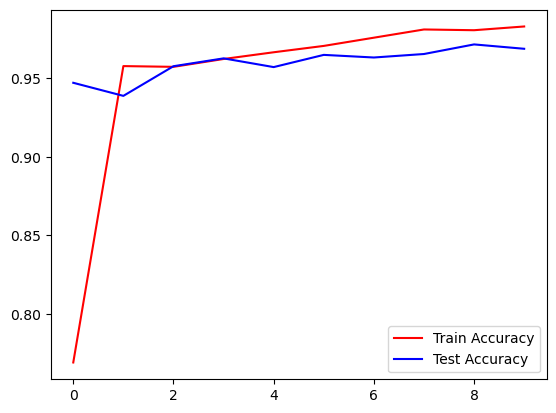

In [87]:
# plot the accuracy plot
plt.plot(train.history['accuracy'], 'r')
plt.plot(train.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [88]:
y_pred1 = model1.predict(x_test)
y_pred_binary1 = np.round(y_pred1)
class_report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(class_report)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       885
           1       0.97      0.97      0.97       915

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800



57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Confusion Matrix:
[[862  23]
 [ 33 882]]


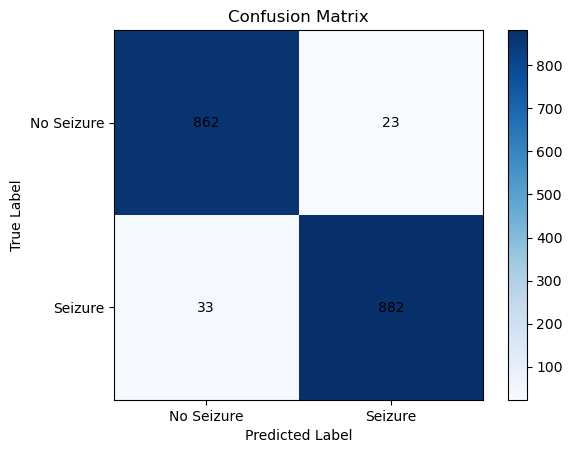

In [89]:
y_pred1 = model1.predict(x_test)
y_pred_binary1 = np.round(y_pred1)

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary1)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Seizure', 'Seizure']  # Assuming binary classification
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')


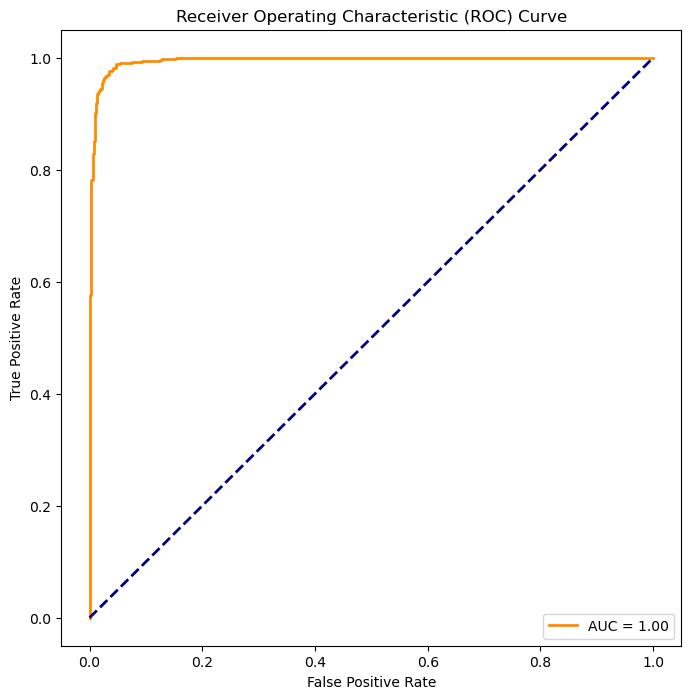

In [90]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [98]:
# Assuming your trained model object is named `model`
file_name = r'C:\Users\HP\Desktop\ITML22- Epileptic Seizure Prediction\CODE\FRONT END\cnn1D_model.h5'

# Save the model
model1.save(file_name)

print("Model saved successfully.")

Model saved successfully.


Hybrid Model

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Train a Random Forest classifier for feature extraction
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Extract features using the trained Random Forest
rf_features_train = rf_model.predict(x_train)
rf_features_test = rf_model.predict(x_test)

# Concatenate the original features with the extracted features
X_train_combined = np.concatenate([X_train_scaled, rf_features_train.reshape(-1, 1)], axis=1)
X_test_combined = np.concatenate([X_test_scaled, rf_features_test.reshape(-1, 1)], axis=1)

# Convert target labels to categorical format
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define  Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_combined.shape[1],)))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(2, activation='softmax'))  # Assuming binary classification

# Compile and train the Neural Network
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = nn_model.fit(X_train_combined, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
nn_predictions = nn_model.predict(X_test_combined)
nn_predicted_labels = np.argmax(nn_predictions, axis=1)

# Evaluate the performance of the hybrid model
accuracy = accuracy_score(y_test, nn_predicted_labels)
print(f'Hybrid Model Accuracy: {accuracy}')

# Display other evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, nn_predicted_labels))

# Display the confusion matrix
cm = confusion_matrix(y_test, nn_predicted_labels)
print('\nConfusion Matrix:')
print(cm)


Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5842 - loss: 0.6386 - val_accuracy: 0.9179 - val_loss: 0.3379
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: 0.3401 - val_accuracy: 0.9869 - val_loss: 0.2149
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9509 - loss: 0.2302 - val_accuracy: 0.9940 - val_loss: 0.1317
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9799 - loss: 0.1450 - val_accuracy: 0.9976 - val_loss: 0.0823
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0997 - val_accuracy: 0.9988 - val_loss: 0.0499
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0709 - val_accuracy: 0.9988 - val_loss: 0.0318
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9921 - loss: 0.0514 - val_accuracy: 0.9988 - val_loss: 0.0214
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9946 - loss: 0.0338 - val_accuracy: 0.9988 - val_

Confusion Matrix:
[[856  29]
 [  6 909]]


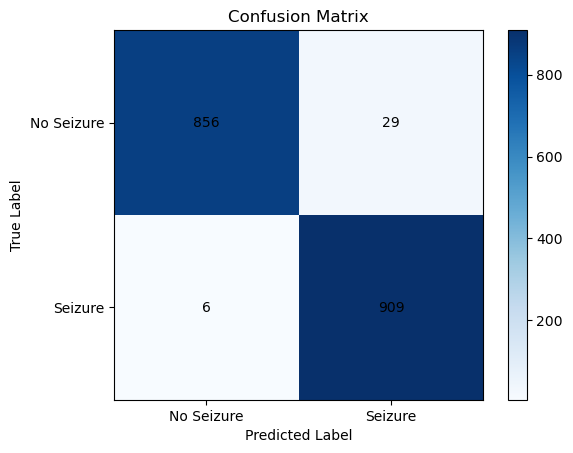

In [102]:
# Generate and print the confusion matrix
cm = confusion_matrix(y_test, nn_predicted_labels)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Seizure', 'Seizure']  # Assuming binary classification
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')


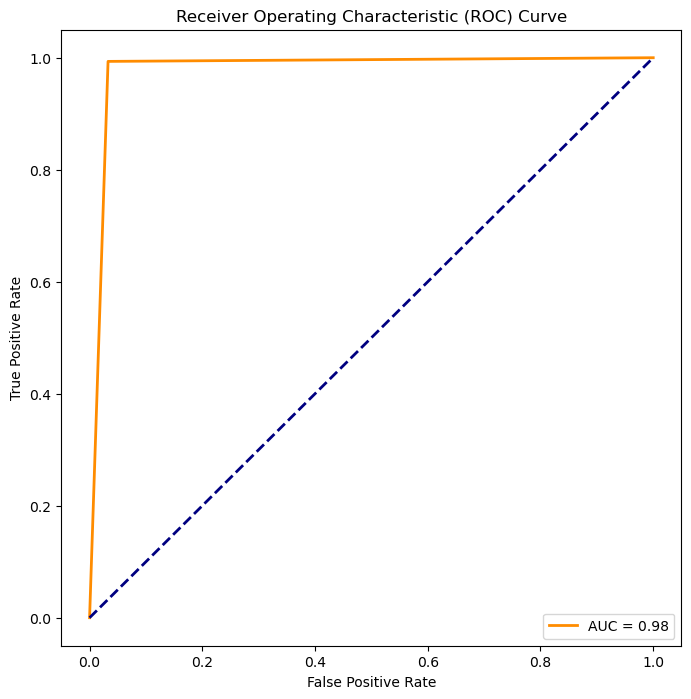

In [103]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, nn_predicted_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

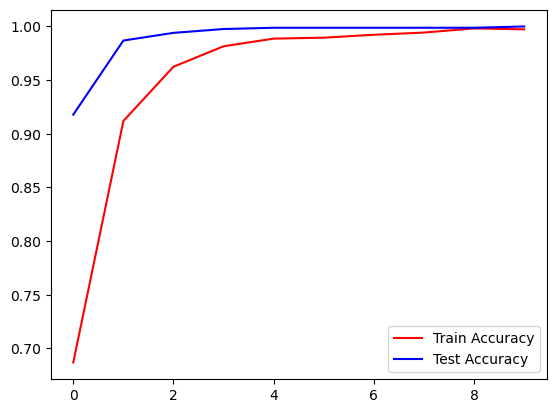

In [104]:
# plot the accuracy plot
plt.plot(history2.history['accuracy'], 'r')
plt.plot(history2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [105]:
# Assuming your trained model object is named `model`
file_name = r'C:\Users\HP\Desktop\ITML22- Epileptic Seizure Prediction\CODE\FRONT END\cnn1D_model.h5'

# Save the model
model1.save(file_name)

print("Model saved successfully.")

Model saved successfully.
